In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

# Preparing my enviroment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt

# pd.set_option('max_column')

# perpare the data

In [3]:
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [4]:
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

# cleaning the data

In [8]:
df['Id']=df['Id'].astype(str)
df['ActivityDate']=pd.to_datetime(df['ActivityDate'],format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [9]:
df['distance_diff']=df['TotalDistance']-df['TrackerDistance']
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [10]:
df.query('distance_diff > 0.0')
# TotalDistance column is not same as TrackerDistance

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [11]:
# create columns
day_of_week=df['ActivityDate'].dt.day_name()
df['day_of_week']=day_of_week

df['n_day_of_week']=df['ActivityDate'].dt.weekday
# 0 is monday and 6 is sunday

In [12]:
df.head()
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'distance_diff',
       'day_of_week', 'n_day_of_week'],
      dtype='object')

In [13]:
# checking null values
df.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
distance_diff               0
day_of_week                 0
n_day_of_week               0
dtype: int64

In [14]:
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
distance_diff               0
day_of_week                 0
n_day_of_week               0
dtype: int64

In [15]:
# checking duplicates
df.duplicated().sum()

0

In [16]:
# subset data
df = df[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'day_of_week', 'n_day_of_week']].copy()

In [17]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,30,11,181,1218,1776,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,29,34,209,726,1745,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,36,10,221,773,1863,Saturday,5


# Analysis phase

In [18]:
# 1st category
# sendentary less than 6000
# active between 6000 and 12000 on average
# very active more than 12000 on average
id_grp = df.groupby(['Id'])
id_avg_step = id_grp['TotalSteps'].mean().sort_values(ascending=False)
id_avg_step = id_avg_step.to_frame()

conditions=[
    (id_avg_step <= 6000),
    (id_avg_step > 6000 ) & (id_avg_step < 12000),
    (id_avg_step >= 12000)
]
values = ['sedentary','active','very_active']

id_avg_step['activity_level'] = np.select(conditions,values)

id_activity_level = id_avg_step['activity_level']

df['activity_level'] = [id_activity_level[c] for c in df['Id']]

df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,25,13,328,728,1985,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,21,19,217,776,1797,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,30,11,181,1218,1776,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,29,34,209,726,1745,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,36,10,221,773,1863,Saturday,5,very_active


Text(0.5, 1.0, 'correlation calories vs. steps')

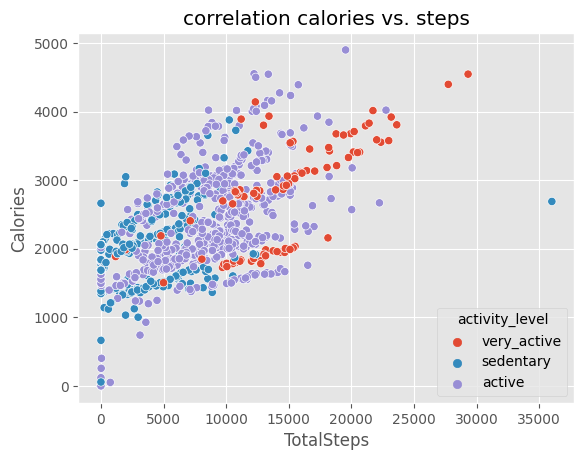

In [19]:
# correlation between steps and calories burned
ax = sns.scatterplot(x='TotalSteps',y='Calories',data=df,hue=df['activity_level'])

plt.title('correlation calories vs. steps')

Text(0.5, 1.0, 'Avg number of steps per day')

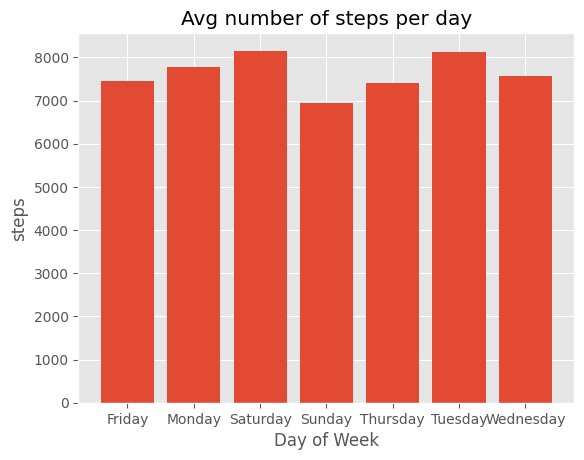

In [20]:
# average steps per day

fig,ax= plt.subplots(1,1)
day_grp=df.groupby(['day_of_week'])
avg_daily_steps=day_grp['TotalSteps'].mean()
avg_steps = df['TotalSteps'].mean()


plt.bar(avg_daily_steps.index,avg_daily_steps)
# ax.axhline(y=avg_daily_steps ,color='blue',label='Avg daily steps')
ax.set_ylabel('steps')
ax.set_xlabel('Day of Week')
ax.set_title('Avg number of steps per day')